## HOMEWORK 06

### IST 687
#
### Student name: BHAVISH KUMAR
### Homework number: 06
### Date due: 7th OCTOBER 2019
#
### Attribution statement: (choose the statements that are true)
### 1. I did this homework by myself, with help from the book and the professor

In [1]:
dev.off() # Clear the graph window
cat('\014')  # Clear the console
rm(list=ls()) # Clear all user objects from the environment!!!

# Set working directory 
# Change to the folder containing your homework data files
#setwd("C:\\Users\\LENOVO\\Desktop\\SYR ADS\\Sem 1\\IST 687 Intro to Data Science\\Prep Exercise & Homework")

null device 
          1

### Codes from Prep Exercise 06 to create mergedDF

#### Step 1:

##### Uploading dfStates data from csv

In [3]:
dfStates <- read.csv("Nst-est2011.csv", stringsAsFactors = FALSE)

In [4]:
readStates <- function(inputDataFrame) {               ### using the same readStates function that was used in Homework 3 to take a dataframe as input and clean it up 
  inputDataFrame1 <- inputDataFrame[-60:-66,]
  inputDataFrame2 <- inputDataFrame1[-1:-8,]                 ## Removing Unnecessary Rows
  inputDataFrame3 <- inputDataFrame2[,-6:-10]                ## Removing Unwanted Columns
  
  newcolnames <- c("stateName", "Census",  "Estimated", "Pop2010", "Pop2011")      
  colnames(inputDataFrame3) <- newcolnames   ### Renaming the existing column names to new more intuitive column names
  
  stateName <- gsub(",","",as.character(inputDataFrame3$stateName))
  CensusCleaned <- as.numeric(gsub(",","",inputDataFrame3$Census))
  EstimatedCleaned <- as.numeric(gsub(",","",inputDataFrame3$Estimated))
  Pop2010Cleaned <- as.numeric(gsub(",","",inputDataFrame3$Pop2010))
  Pop2011Cleaned <- as.numeric(gsub(",","",inputDataFrame3$Pop2011))       ### Cleaning the columns and creating a new dataframe
  stateName <- sub(".","",stateName)                                       ### Removing the . from the values in stateName column
  dfStates <- data.frame(stateName,CensusCleaned,EstimatedCleaned,Pop2010Cleaned, Pop2011Cleaned)
  rownames(dfStates) = NULL
  return(dfStates)
}

In [5]:
states <- readStates(dfStates)    ### Obtaining the cleaned dataframe output returned from the readStates function that was used in HW03 and storing it in states dataframe

In [6]:
arrests <- USArrests                 ### Creating a new dataframe 'arrests' that contains USArrests data
arrests$stateName <- rownames(arrests)    ### Creating a new 'stateName' column in the arrests dataframe that contains the rownames of the dataframe

In [7]:
mergeDF <- merge(states,arrests,by.x = "stateName", by.y = "stateName")   ### Merging the 2 dataframes on stateName column to create a new dataframe that has columns from both the tables

In [8]:
library("ggplot2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# HW 06 Questions

## Step 1: Explore the Merged Data – Understanding distributions

#### A. Use the merged dataset created during this week’s prep work (mergedDF)

In [9]:
str(mergeDF)

'data.frame':	50 obs. of  9 variables:
 $ stateName       : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 10 11 ...
 $ CensusCleaned   : num  4779736 710231 6392017 2915918 37253956 ...
 $ EstimatedCleaned: num  4779735 710231 6392013 2915921 37253956 ...
 $ Pop2010Cleaned  : num  4785401 714146 6413158 2921588 37338198 ...
 $ Pop2011Cleaned  : num  4802740 722718 6482505 2937979 37691912 ...
 $ Murder          : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault         : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop        : int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape            : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


### B. Create separate histograms using ggplot2() for the Pop2011, murder rate, assault and rape columns. Make sure each line of code is explained (comments) in terms of what it is doing. What parameter will you have to adjust to make the other histograms look right?

##### Histogram for Pop2011

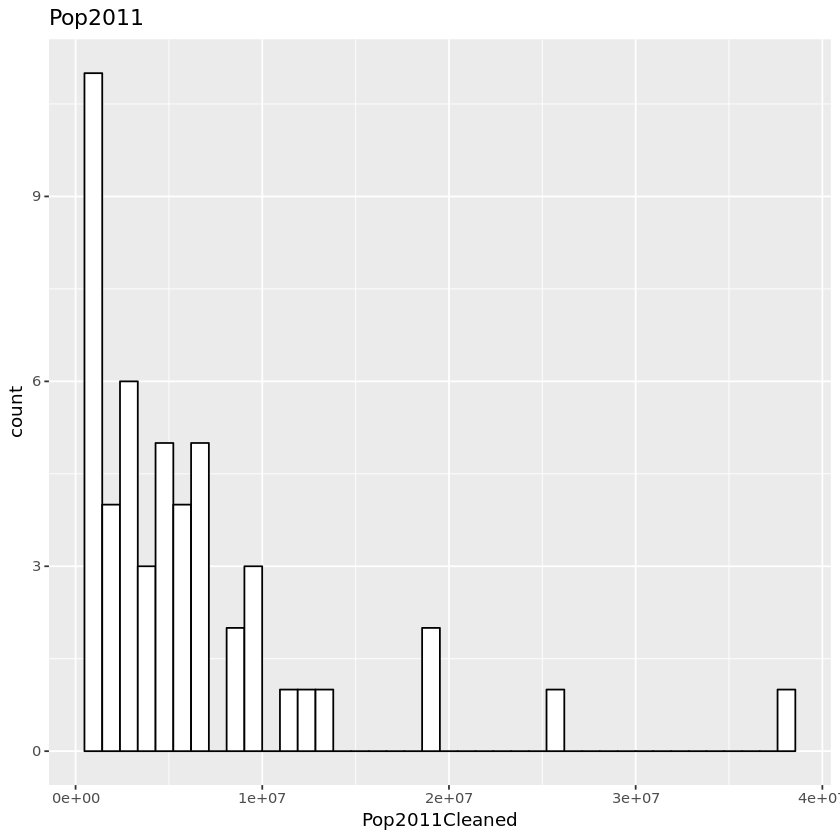

In [10]:
myPlot <- ggplot(mergeDF, aes(x=Pop2011Cleaned))       ### Creating a ggplot with mergeDF dataframe and using Pop2011 column in X axis.
 myPlot <- myPlot + geom_histogram(bins=40, color="black", fill="white")   ### Producing a black bordered histogram filled with white color of Pop2011 with 40 bins
 myPlot <- myPlot + ggtitle("Pop2011")   ### Adding a title to the histogram
 myPlot

##### Histogram for Murder

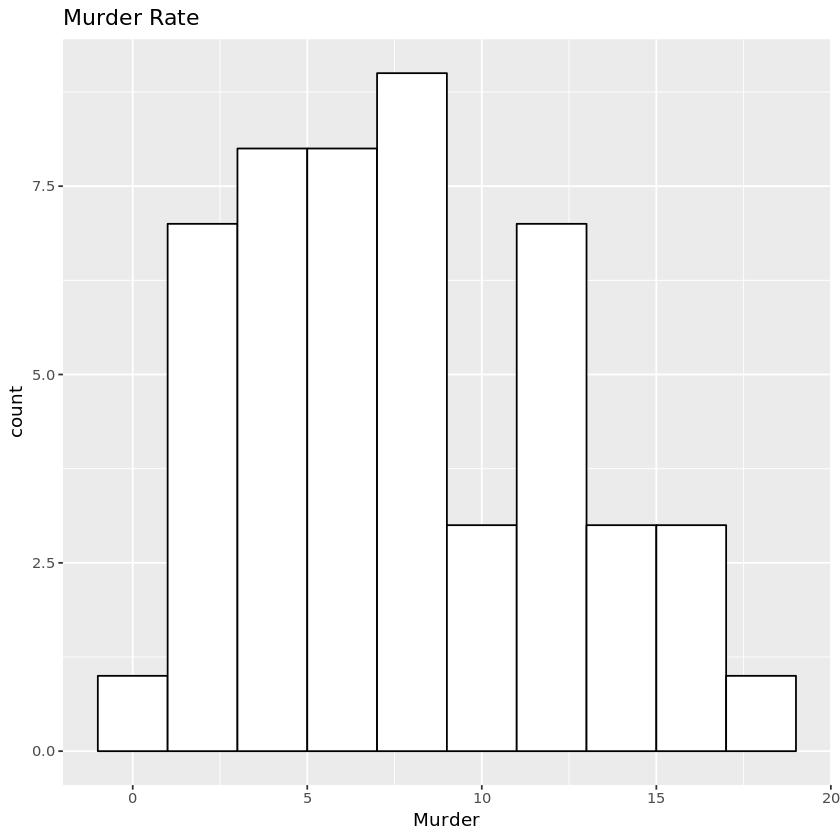

In [11]:
myPlot <- ggplot(mergeDF, aes(x=Murder))       ### Creating a ggplot with mergeDF dataframe and using Murder column in X axis.
 myPlot <- myPlot + geom_histogram(binwidth=2, color="black", fill="white")   ### Producing a black bordered histogram filled with white color of Murder with binwidth 2
 myPlot <- myPlot + ggtitle("Murder Rate")   ### Adding a title to the histogram
 myPlot

##### Histogram for Assault

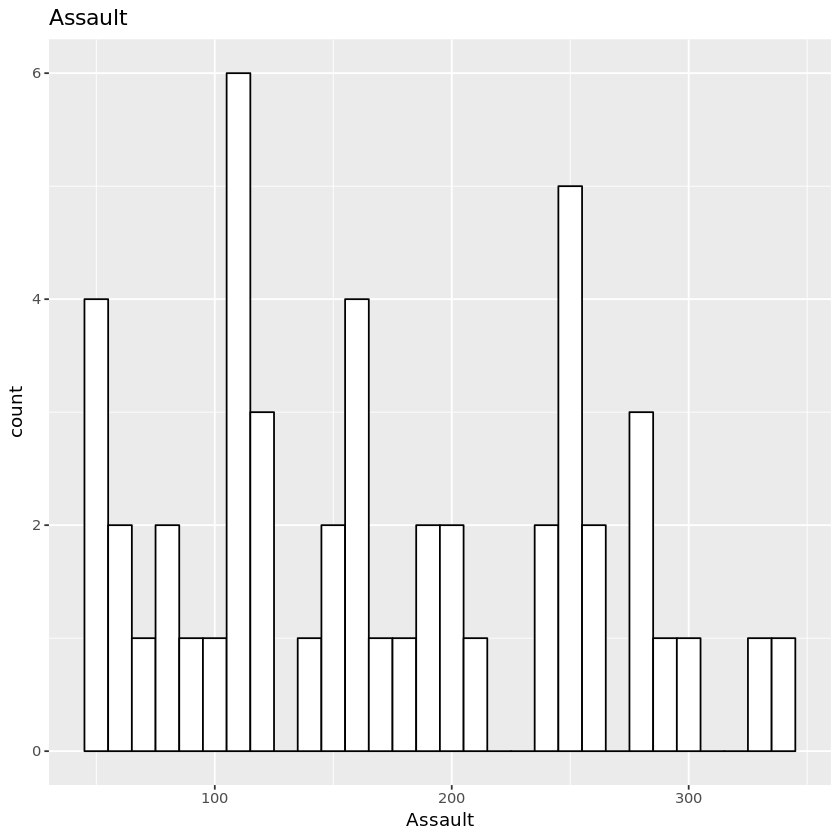

In [12]:
myPlot <- ggplot(mergeDF, aes(x=Assault))       ### Creating a ggplot with mergeDF dataframe and using Assault column in X axis.
 myPlot <- myPlot + geom_histogram(binwidth=10, color="black", fill="white")   ### Producing a black bordered histogram filled with white color of Assault with binwidth 10
 myPlot <- myPlot + ggtitle("Assault")   ### Adding a title to the histogram
 myPlot

##### Histogram for Rape

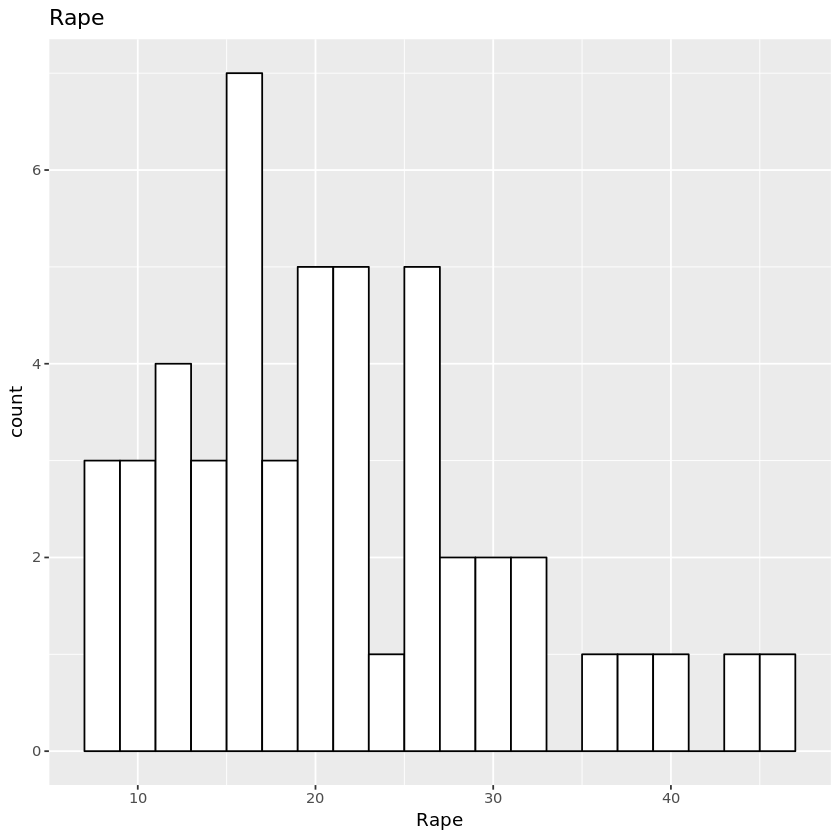

In [16]:
myPlot <- ggplot(mergeDF, aes(x=Rape))       ### Creating a ggplot with mergeDF dataframe and using Rape column in X axis.
 myPlot <- myPlot + geom_histogram(binwidth=2, color="black", fill="white")   ### Producing a black bordered histogram filled with white color of Rape with binwidth 2
 myPlot <- myPlot + ggtitle("Rape")   ### Adding a title to the histogram
 myPlot

##### The binwidth or the number of bins have to be adjusted for the histograms to look right. For Pop2011 we used 40 bins, whereas for Murder & Rape we use binwidth 2 and bindwidth 10 for Assault. These adjustments had to be made by taking into account the spread and the range of the data. 

### C. Create a boxplot for the Pop2011, and a different boxplot for the murder rate.

#### Boxplot for Pop2011

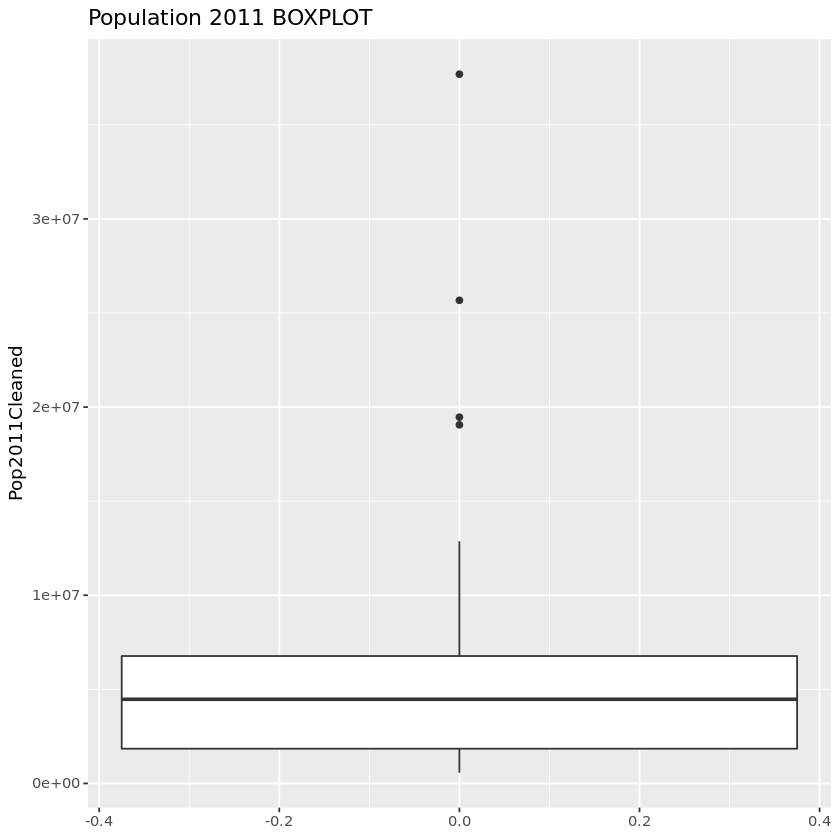

In [14]:
ggplot(mergeDF) +    ### This is to create a ggplot with the mergeDF dataframe
       aes(y=Pop2011Cleaned) +    ### Using the Population 2011 column of the dataframe as Y axis
       geom_boxplot() +   ### Specifying that we want to produce a boxplot using the Population 2011 column
       ggtitle("Population 2011 BOXPLOT")  ### Providing a title for the Boxplot

#### Boxplot for Murder Rate

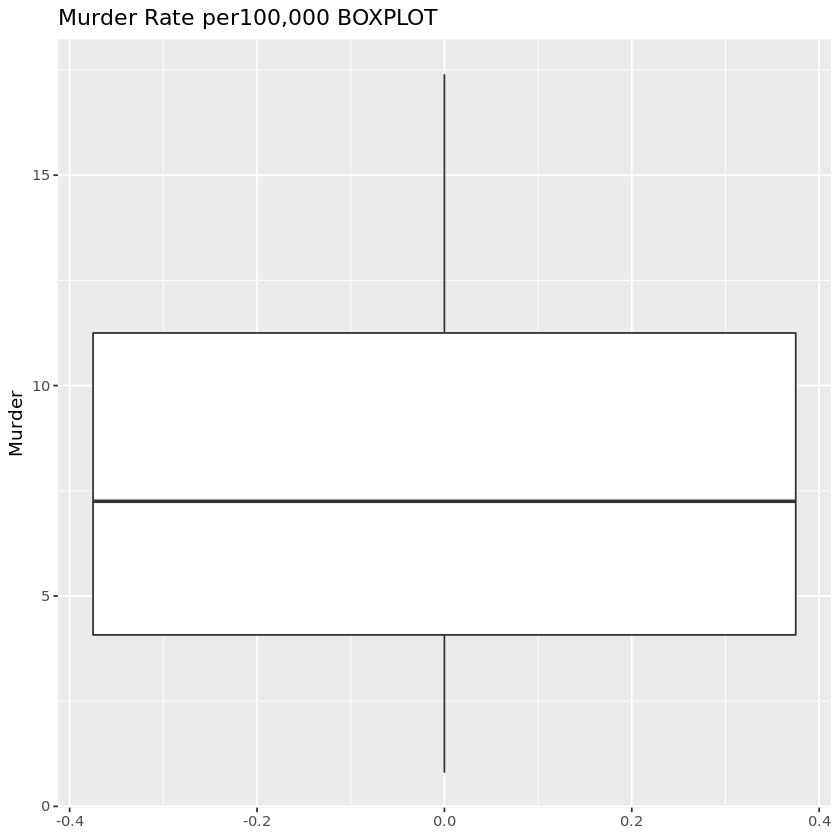

In [16]:
ggplot(mergeDF) +    ### This is to create a ggplot with the mergeDF dataframe
       aes(y=Murder) +    ### Using the murder column of the dataframe as Y axis
       geom_boxplot() +   ### Specifying that we want to produce a boxplot using the Murder column
       ggtitle("Murder Rate per100,000 BOXPLOT")  ### Providing a title for the Boxplot

### D. Create a block comment explaining which visualization (boxplot or histogram) you thought was more helpful (explain why)

##### The histogram is more helpful because it tells us the type of the distribution and also the spread of the distribution. We will be able to understand whether it follows a Normal Distribution or not and also understand the skewness of the distribution. Whereas the Boxplot only helps us understand the Median, the IQR and the Range.

## Step 2: Which State had the Most Murders – bar charts

### A. Calculate the number of murders per state (a. Hint: use the population and murder rate percentage from your new dataframe)

In [17]:
mergeDF$no_of_murders_per_state <- mergeDF$Murder*mergeDF$Pop2011Cleaned/100000

### B. Generate a bar chart, with the number of murders per state (Hint: use the geom_col() function)

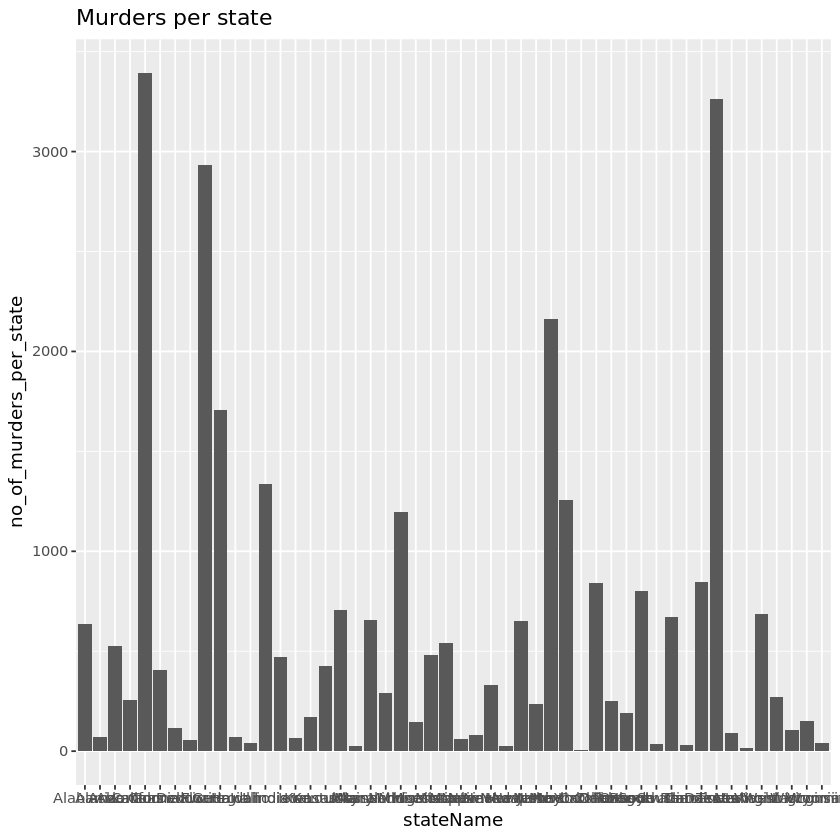

In [18]:
ggplot(mergeDF) +    ### This is to create a ggplot with the mergeDF dataframe
       aes(x=stateName, y=no_of_murders_per_state) +    ### Using the no of murders column of the dataframe as Y axis & state as X axis
       geom_col() +   ### Specifying that we want to produce a bar graph using the Murder column
       ggtitle("Murders per state")  ### Providing a title for the Bar graph

### C. Generate a bar chart, with the number of murders per state. Rotate text (on the X axis), so we can see x labels, also add a title named “Total Murders”. (a. Hint: use theme(axis.text.x = element_text(angle = 90, hjust = 1)))

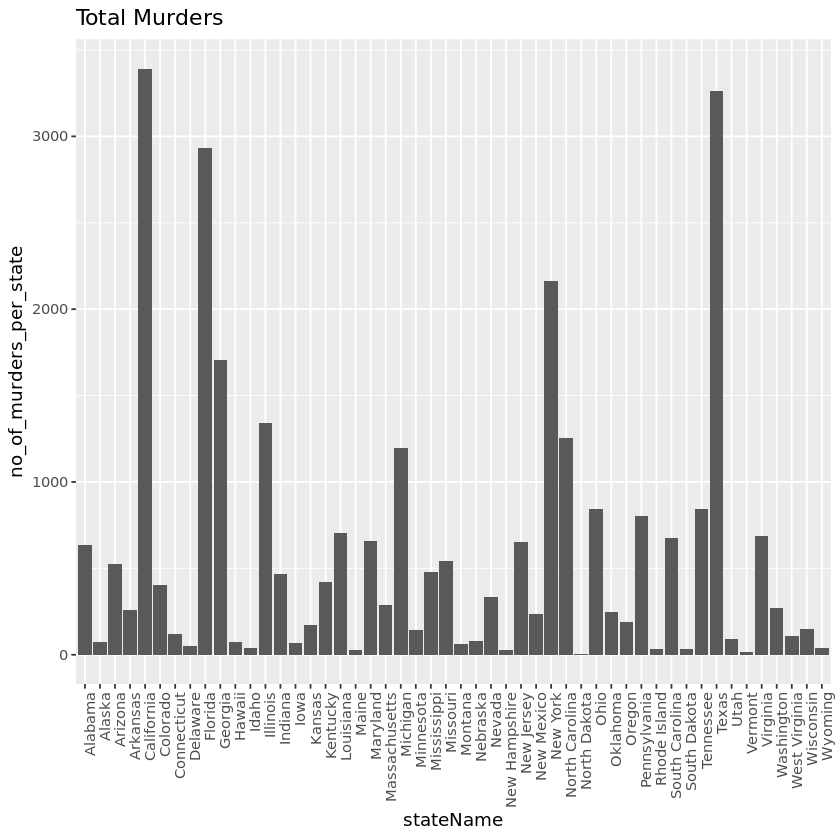

In [20]:
ggplot(mergeDF) +    ### This is to create a ggplot with the mergeDF dataframe
       aes(x=stateName, y=no_of_murders_per_state) +    ### Using the no of murders column of the dataframe as Y axis & state as X axis
       geom_col() +   ### Specifying that we want to produce a bar graph using the Murder column
       theme(axis.text.x = element_text(angle = 90, hjust = 1)) +   ### Rotating the text on X axis to be able to see the x labels
       ggtitle("Total Murders")  ### Providing a title for the Bar Graph

### D. Generate a new bar chart, the same as in the previous step, but also sort the x-axis by the murder rate from low to high

###### States sorted by Murder Rate and not by total number of murders. Here Georgia has the highest Murder Rate and California has the highest number of total murders.

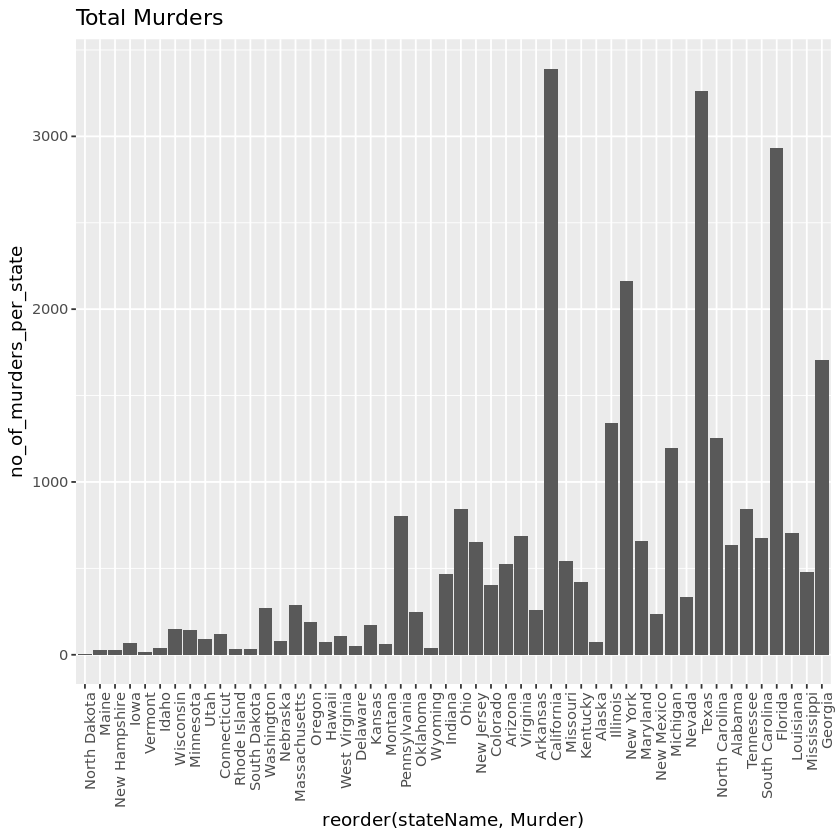

In [24]:
ggplot(mergeDF) +    ### This is to create a ggplot with the mergeDF dataframe
       aes(x= reorder(stateName,Murder), y=no_of_murders_per_state) + ### no of murders column as Y axis & state as X axis sorting state by Murder Rate and not by total number of murders 
       geom_col() +   ### Specifying that we want to produce a bar graph using the Murder column
       theme(axis.text.x = element_text(angle = 90, hjust = 1)) +   ### Rotating the text on X axis to be able to see the x labels
       ggtitle("Total Murders")  ### Providing a title for the Bar Graph

### E. Generate a third bar chart, the same as the previous step, but also showing UrbanPop as the color of the bar

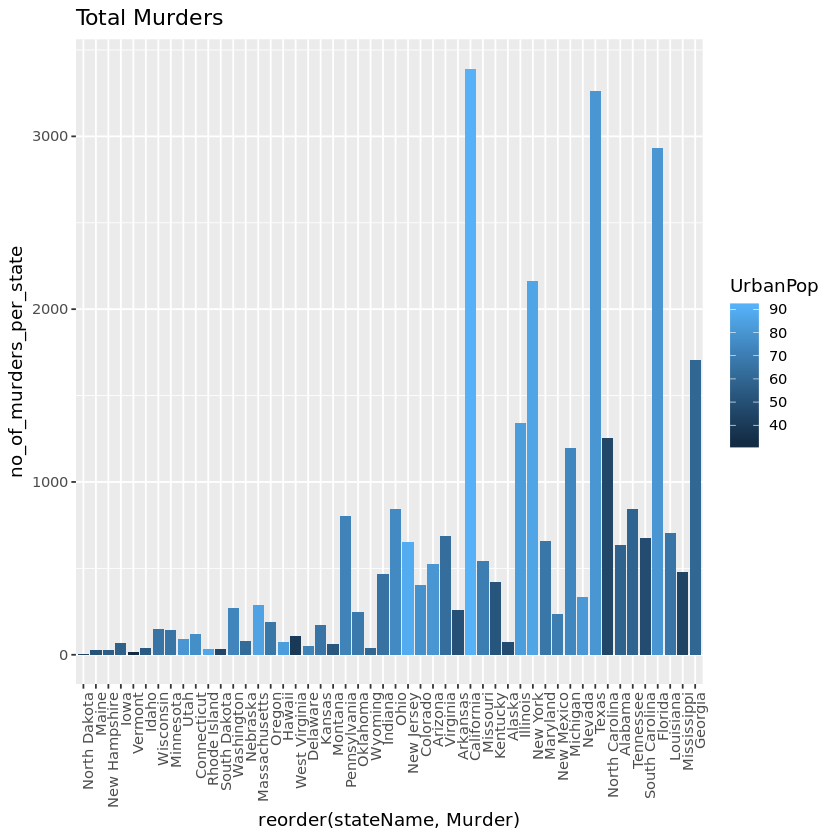

In [25]:
ggplot(mergeDF) +    ### This is to create a ggplot with the mergeDF dataframe
       aes(x= reorder(stateName,Murder), y=no_of_murders_per_state) + ### no of murders column as Y axis & state as X axis sorting state by Murder Rate and not by total number of murders 
       geom_col(aes(fill = UrbanPop)) +   ### Specifying that we want to produce a bar graph using the Murder column
       theme(axis.text.x = element_text(angle = 90, hjust = 1)) +   ### Rotating the text on X axis to be able to see the x labels
       ggtitle("Total Murders")  ### Providing a title for the Bar graph

## Step 3: Explore Murders – scatter chart

### A. Generate a scatter plot – have Pop2011 on the X axis, the UrbanPop on the y axis, and the size & color represent the number of murders.

In [26]:
str(mergeDF)

'data.frame':	50 obs. of  10 variables:
 $ stateName              : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 10 11 ...
 $ CensusCleaned          : num  4779736 710231 6392017 2915918 37253956 ...
 $ EstimatedCleaned       : num  4779735 710231 6392013 2915921 37253956 ...
 $ Pop2010Cleaned         : num  4785401 714146 6413158 2921588 37338198 ...
 $ Pop2011Cleaned         : num  4802740 722718 6482505 2937979 37691912 ...
 $ Murder                 : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault                : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop               : int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape                   : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...
 $ no_of_murders_per_state: num  634 72.3 525.1 258.5 3392.3 ...


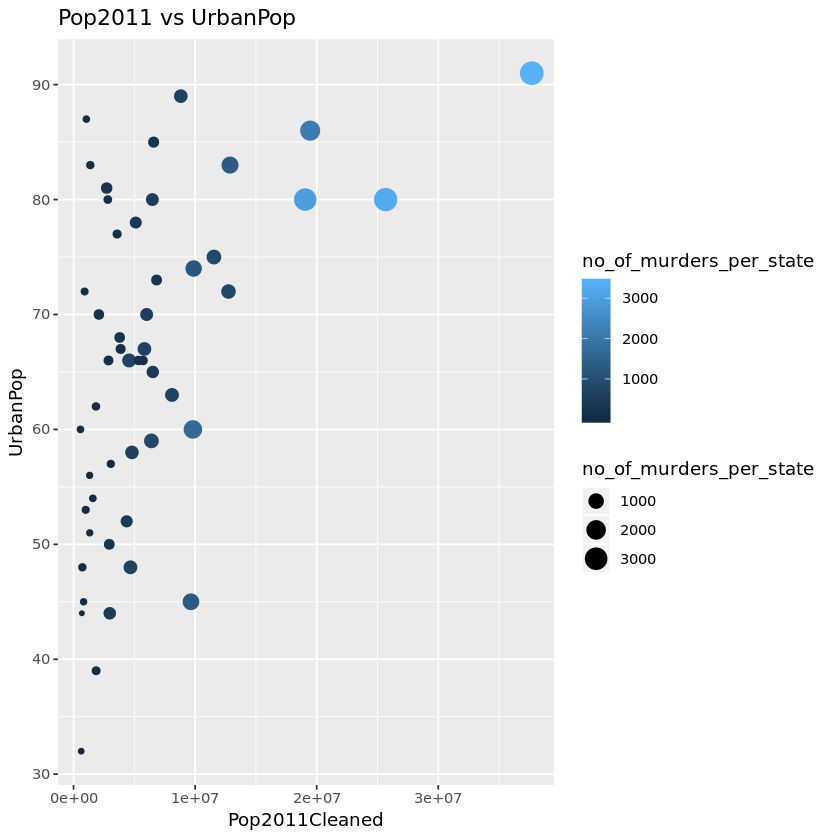

In [27]:
ggplot(mergeDF) +    ### This is to create a ggplot with the mergeDF dataframe
       aes(x= Pop2011Cleaned, y=UrbanPop) + ### Urban Pop as Y axis & Pop 2011 as X axis
       geom_point(aes(color = no_of_murders_per_state, size = no_of_murders_per_state)) +  ### scatter plot with size & color representing total number of murders
       ggtitle("Pop2011 vs UrbanPop")  ### Providing a title for the Scatter Plot